#chorogrid tutorial, part 2A:

## Chorogrid class

This is a continuation of part 2, focusing only on the Canadian federal ridings

In [1]:
# import the classes
from chorogrid import Colorbin, Chorogrid

In [2]:
mycolors = ['#b35806', '#f1a340', '#fee0b6', '#d8daeb', '#998ec3', '#542788']

Now to Canada. Here is a hex grid (made by me, using gephi) of the 338 federal electoral ridings defined in 2013; since each riding has approximately the same population, it is almost a cartogram. Ridings are colored according to province.

In [3]:
with open('chorogrid/databases/canada_federal_ridings_column_descriptions.txt', 'r', encoding='utf-8') as f:
    print(f.read())

district_code               Federal electoral district code
province                    Two-letter province postal abbreviation
federal_electoral_district  Name of federal riding
population                  Population in riding
electors                    Number of eligible voters in riding
area_km2                    Area of riding in square kilometers
square_x                    Horizontal position of square
square_y                    Vertical position of square
truecolhex_x                Horizontal position of hex with true columns
truecolhex_y                Vertical position of hex with true columns


In [4]:
# assign a different color to each district_code according to province

import pandas as pd
df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
provinces = df.province.unique()
province2color = {}
for i, province in enumerate(provinces):
    province2color[province] = mycolors[i % len(mycolors)]
canada_riding_colors = [province2color[province] for province in list(df.province)]

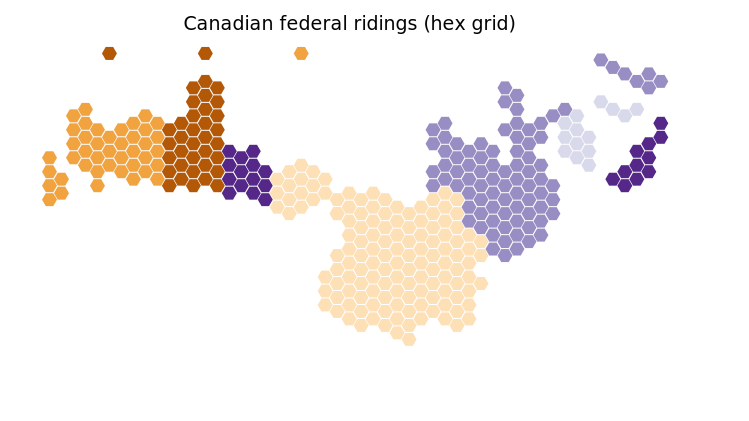

In [5]:
cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (hex grid)', font_dict={'font-size': 19})
cg_ridings.draw_hex('truecolhex_x', 'truecolhex_y', true_rows=False,
                    spacing_dict={'cell_width': 15, 'roundedness': 2},
                        font_dict={'fill-opacity': 0})
cg_ridings.done(show=True)

Now let's show what the results of the 2011 federal election (which had 308 ridings) would have looked like in the new 338-riding schema. Elections Canada has done the math, splitting up polling stations results into their new ridings at http://www.elections.ca/res/cir/trans2013/default.asp?lang=e. Under "Download file for all of Canada (CSV format – 1 file)", download "Download Grouped Polling Divisions". The resulting file, ``TRANSPOSITION_338FED.csv``, has been included in Chorogrid's sample_data folder.

In [24]:
df_elxn = pd.read_csv('chorogrid/sample_data/TRANSPOSITION_338FED.csv', skiprows=4, encoding='latin-1', index_col=False)
df_elxn = df_elxn[['2013 FED Number', 'Conservative votes', 'NDP-New Democratic Party votes', 'Liberal votes', 'Bloc Québécois votes', 'Green Party votes']]
df_elxn.columns = ['FED', 'Con', 'NDP', 'Lib', 'BQ', 'Green']
df_elxn = pd.DataFrame(df_elxn.groupby('FED').sum())
df_elxn['winner'] = ''
for idx, row in df_elxn.iterrows():
    rowlist = list(row)[:5]
    winner = ['Conservative',
              'NDP',
              'Liberal',
              'Bloc Québécois',
              'Green'][rowlist.index(max(rowlist))]
    df_elxn.loc[idx, 'winner'] = winner
    
winner2colors = {'Conservative': '#3333aa',
                 'NDP': '#bb8811',
                 'Liberal': '#aa3333',
                 'Bloc Québécois': '#11bbbb',
                 'Green': '#33aa33'}

df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
canada_riding_colors = []
for idx, row in df.iterrows():
    fed = row.district_code
    winner = df_elxn.winner.ix[fed]
    canada_riding_colors.append(winner2colors[winner])
    
parties = list(winner2colors.keys())
parties.sort()
parties.reverse()
partycolors = [winner2colors[k] for k in parties]

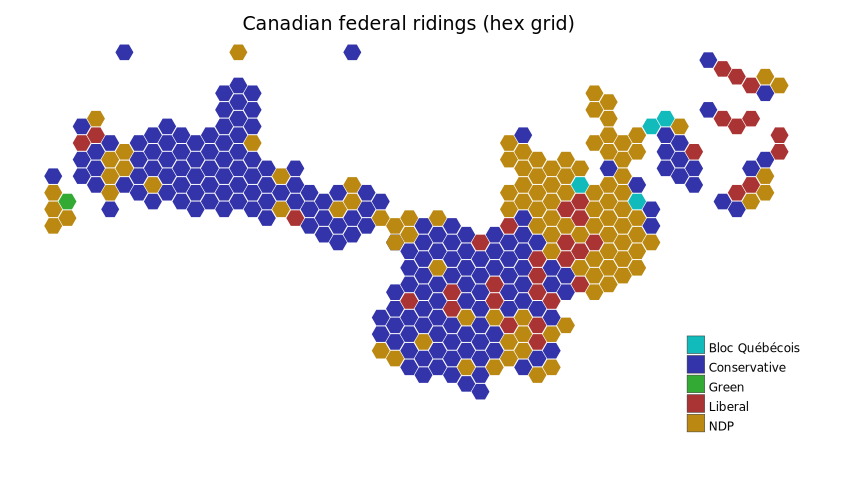

In [29]:
cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (hex grid)', font_dict={'font-size': 19})
cg_ridings.set_legend(partycolors, parties)
cg_ridings.draw_hex('truecolhex_x', 'truecolhex_y', true_rows=False,
                    spacing_dict={'cell_width': 18, 'roundedness': 2, 'legend_offset': (-100,-50)},
                        font_dict={'fill-opacity': 0})
cg_ridings.done(show=True)

Note that bolded provincial boundaries for the hex grid have not yet been implemented; it's on the to-do list.

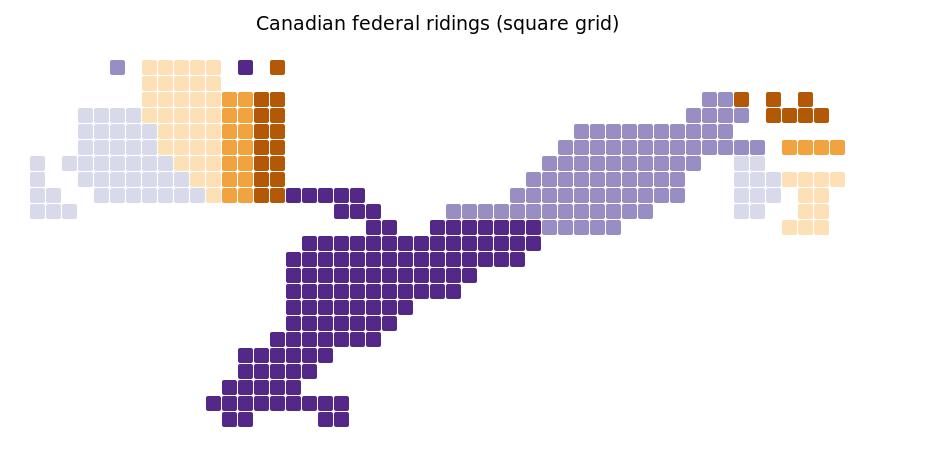

In [7]:
cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (square grid)', font_dict={'font-size': 19})
cg_ridings.draw_squares(spacing_dict={'cell_width': 15, 'roundedness': 2},
                        font_dict={'fill-opacity': 0})
cg_ridings.done(show=True)

# Note that we passed list(df.district_code) as ids because our colors happened to be ordered the same as the
# ids in the database file. This is normally not the case, so we have to explicitly pass ids every time
# Chorogrid is instantiated.

And here is a multisquare of the Canadian provinces based on the above ridings.

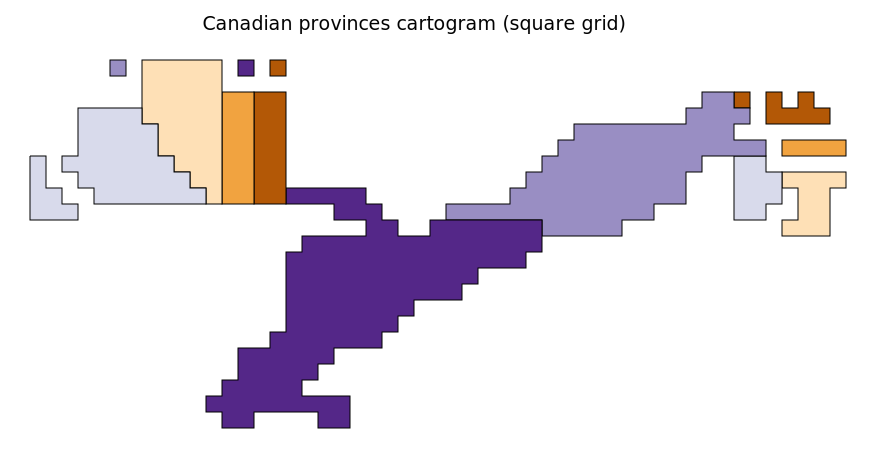

In [8]:
import pandas as pd
df_prov = pd.read_csv('chorogrid/databases/canada_provinces.csv')

canada_prov_colors = [mycolors[x % len(mycolors)] for x in range(len(list(df_prov.province)))]

cg_prov = Chorogrid('chorogrid/databases/canada_provinces.csv', df_prov.province, canada_prov_colors, 'province')
cg_prov.set_title('Canadian provinces cartogram (square grid)', font_dict={'font-size': 19})
cg_prov.draw_multisquare(font_dict={'fill-opacity': 0}, 
                    spacing_dict={'margin_bottom': 250, 'cell_width': 16,
                                  'stroke_width': 1, 'stroke_color': '#000000'})
cg_prov.done(show=True)

# Known issue: we have to add a bottom margin of 250 to make this map visible, normally the height variable
# should take care of that without tweaking. It's because the added height from the contours is not added.

Now we can overlay the borders from the provinces multisquare, setting the fill colors to 'none' (the string, not ``None`` the Python object), atop the ridings map.

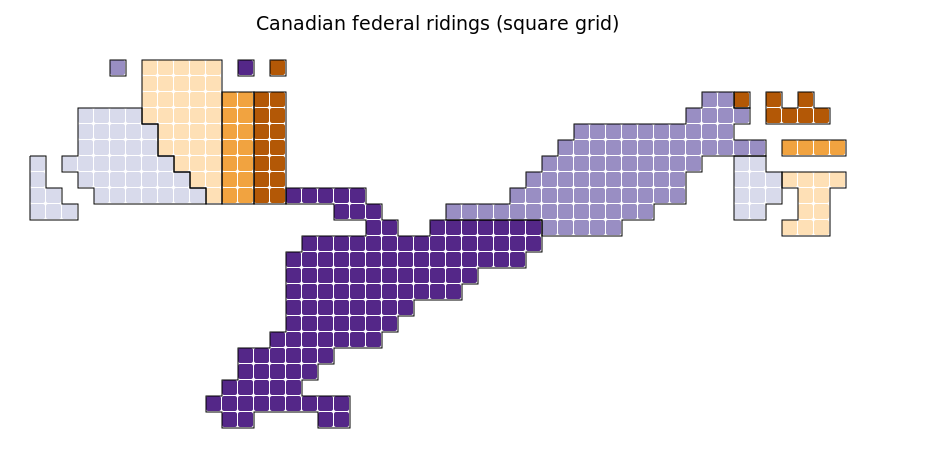

In [9]:
import pandas as pd
df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
provinces = df.province.unique()
province2color = {}
for i, province in enumerate(provinces):
    province2color[province] = mycolors[i % len(mycolors)]
canada_riding_colors = [province2color[province] for province in list(df.province)]

cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (square grid)', font_dict={'font-size': 19})
cg_ridings.draw_squares(spacing_dict={'cell_width': 15, 'roundedness': 2},
                        font_dict={'fill-opacity': 0})

df_prov = pd.read_csv('chorogrid/databases/canada_provinces.csv')
canada_prov_colors = ['none' for x in range(len(df_prov.province))]

cg_prov = Chorogrid('chorogrid/databases/canada_provinces.csv', df_prov.province, canada_prov_colors, 'province')
cg_prov.draw_multisquare(font_dict={'fill-opacity': 0}, 
                    spacing_dict={'margin_bottom': 250, 'cell_width': 16,
                                  'stroke_width': 1, 'stroke_color': '#000000'})

cg_ridings.done_and_overlay(cg_prov, show=True)

# Known issue: overlay cell width must be set to 16, while ridings cell width is set to 15, because
# overlay stroke==1.

And here's the square grid with the transposed 2011 elections results

In [33]:
df_elxn = pd.read_csv('chorogrid/sample_data/TRANSPOSITION_338FED.csv', skiprows=4, encoding='latin-1', index_col=False)
df_elxn = df_elxn[['2013 FED Number', 'Conservative votes', 'NDP-New Democratic Party votes', 'Liberal votes', 'Bloc Québécois votes', 'Green Party votes']]
df_elxn.columns = ['FED', 'Con', 'NDP', 'Lib', 'BQ', 'Green']
df_elxn = pd.DataFrame(df_elxn.groupby('FED').sum())
df_elxn['winner'] = ''
for idx, row in df_elxn.iterrows():
    rowlist = list(row)[:5]
    winner = ['Conservative',
              'NDP',
              'Liberal',
              'Bloc Québécois',
              'Green'][rowlist.index(max(rowlist))]
    df_elxn.loc[idx, 'winner'] = winner
    
winner2colors = {'Conservative': '#3333aa',
                 'NDP': '#bb8811',
                 'Liberal': '#aa3333',
                 'Bloc Québécois': '#11bbbb',
                 'Green': '#33aa33'}

df = pd.read_csv('chorogrid/databases/canada_federal_ridings.csv')
canada_riding_colors = []
for idx, row in df.iterrows():
    fed = row.district_code
    winner = df_elxn.winner.ix[fed]
    canada_riding_colors.append(winner2colors[winner])
    
parties = list(winner2colors.keys())
parties.sort()
parties.reverse()
partycolors = [winner2colors[k] for k in parties]

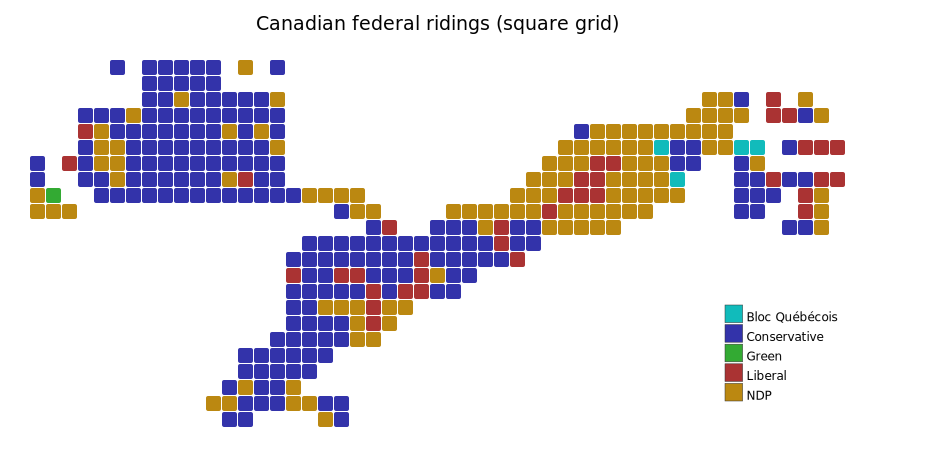

In [38]:
cg_ridings = Chorogrid('chorogrid/databases/canada_federal_ridings.csv', list(df.district_code), 
                       canada_riding_colors, 'district_code')
cg_ridings.set_title('Canadian federal ridings (square grid)', font_dict={'font-size': 19})
cg_ridings.set_legend(partycolors, parties)
cg_ridings.draw_squares(spacing_dict={'cell_width': 15, 'roundedness': 2, 'legend_offset': (-120,-70)},
                        font_dict={'fill-opacity': 0})
cg_ridings.done(show=True)